# Perceptron from Scratch using Python

In this Tutorial, we will see how to implement the perceptron model using Python on sample data. We will further test our model using the Iris dataset and check its performance.

The aim of this tutorial is to gain a fundamental understanding of various components and steps involved for a Perceptron while gaining hands-on experience for its implementation.

# What is a Perceptron?

A perceptron is a fundamental unit of the neural network which takes weighted inputs, process it and capable of performing binary classifications.

The Perceptron algorithm was inspired by the basic processing units in the brain, called neurons, and how they process signals. It was invented by Frank Rosenblatt, using the McCulloch-Pitts neuron and the findings of Hebb.

# Linearly Separable Data

By definition, a perceptron can only solve __linearly separable problems__. What is a linearly separable problem ? 

In the first example, the two different classes are linearly separable by a hyperplane (a single line). A Perceptron can be used for classifying data of this kind.

![alternatvie text](https://jmchung.github.io/img/hl_classif_separation.png)

# Elements of a Perceptron

The following are the main elements of a Perceptron:
1. Input Layer
2. Output
3. Weights
4. Activation function
5. Cost function

![alternatvie text](https://www.nomidl.com/wp-content/uploads/2022/04/image-5.png)

What we are essentially trying to do is to find out values for weights and bias in such a way that

> $Activation(w_{1}x_{1} + w_{2}x_{2}) = Output$

The prediction from the perceptron is denoted using either  0 or 1 to distinguish between the classes in our data

The activation function in the case of a perceptron is a simple Step function.

![alternatvie text](https://miro.medium.com/max/762/1*K9QJmeG33SvQeJgPa52mmQ.png)

A __cost function__ is an important parameter that determines how well a machine learning model performs for a given dataset. 

It calculates the difference between the expected value and predicted value and represents it as a single real number. 

We shall use the residual sum of squares (RSS) cost function for this example.

> $Cost_{RSS} = \sum\limits_{i=1}^{n}{(y_{actual} - \hat{y})^2}$

where, 

> $\hat{y} = w_{1}x_{1} + w_{2}x_{2} + b$

***

# Steps involved for Perceptron

1. Import data


2. Training:
    1. Define number of epochs, learning rate
    2. Initialize weights and bias
    3. Forward Propogation - Get the output from the Perceptron
    4. Backpropogation - Update the weights based on error
    5. Training the model


3. Testing:
    1. Gain predictions on test data
    2. Test performance of Perceptron
    
***

## Importing the libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets

## 1. Data

Let us consider a simple dataset with x1 and x2 denoting the input variables, and y denoting the classes.

In [64]:
df = pd.DataFrame({'x1': [0,0,1,1],
                   'x2': [0,1,0,1],
                   'y' : [0,1,1,1]})

In [65]:
df

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


You can see that the above data resembles the output from an OR Gate, and is linearly separable

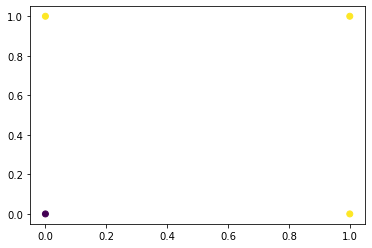

In [66]:
plt.scatter(df['x1'], df['x2'], c = df['y'])

## 2.1 Training: Define number of epochs and learning rate

In [67]:
epochs = 100
#Learning rate
alpha = 0.01

## 2.2 Training: Initialize weights and biases
We start with the weights and biases being equal to zeros

In [68]:
#Weights
w = np.zeros(2)
w

array([0., 0.])

In [69]:
#Bias
b = np.zeros(1)
b

array([0.])

## 2.3 Training: Forward Propogation

In forward propogation, we determine the output of our perceptron model .i.e. $\hat{y}$

We will use the following function to gain the output of forward propogation

In [70]:
def forward_prop(row):
    y_hat = np.dot(x[row], w) + b
    
    if y_hat > 0:
        return 1
    else:
        return 0

## 2.4 Training: Backpropagation

In this step, we will update the weights of our model using gradient descent.

> $Cost_{RSS} = \sum\limits_{i=1}^{n}{(y_{actual} - \hat{y})^2}$

where _n_ : Number of rows in the dataset
    
> $\hat{y} = w_{1}x_{1} + w_{2}x_{2} + b$

__Partial Derivatives__

Now, we want to see what the derivative of the cost function with respect to each of the variables (weights and bias).

$$
\frac{\partial Cost_{RSS}}{\partial w_{1}} = ( y - x_{1}w_{1} + w_{2}x_{2} + b)x_{1} = (y - \hat{y})x_{1}
$$

$$\frac{\partial Cost_{RSS}}{\partial w_{2}} = (y - \hat{y})x_{2}$$

$$\frac{\partial Cost_{RSS}}{\partial b} = (y - \hat{y})$$

#### Update rules

> $w_{1new} = w_{1old} + \alpha \frac{\partial Cost_{RSS}}{\partial w_{1}} = w_{1old} + \alpha (y - \hat{y})x_{1} $

> $w_{2new} = w_{2old} + \alpha \frac{\partial Cost_{RSS}}{\partial w_{2}} = w_{2old} + \alpha (y - \hat{y})x_{2} $

> $b_{new} = b_{old} + \alpha \frac{\partial Cost_{RSS}}{\partial b} = b_{old} + \alpha (y - \hat{y}) $

In [71]:
def backward_prop(y_hat, row, w, b):
    w[0]  = w[0] + alpha * (y[row] - y_hat) * x[row][0]
    w[1]  = w[1] + alpha * (y[row] - y_hat) * x[row][1]
    b     = b + alpha * (y[row] - y_hat)
    
    return w,b

## 2.5: Training the model

Finally, we put together all the steps discussed earlier



In [72]:
#Input
x = df[['x1', 'x2']].to_numpy()
x

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]], dtype=int64)

In [73]:
y = np.array(df['y'])
y

array([0, 1, 1, 1], dtype=int64)

In [74]:
for epoch in range(epochs) :
     
    # for each row in x (cycle through the dataset)
    for row in range(x.shape[0]) :
         
        # for each row in x, predict y_hat
        y_hat = forward_prop(row)
 
        # for each row calculate weights
        backward_prop(y_hat,row, w, b)
 
        print (w, b)

[0. 0.] [0.]
[0.   0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[0.01 0.01] [0.]
[

## 3.1 Gain predictions on test data

We shall create a function that takes the test data as input, and returns an array of predictions from our trained Perceptron model as output

In [75]:
def predict(x) :
    y = []
     
    #Compute predictions (y_hat).
    for row in x :
         
        # weighted sum
        y_pred = np.dot(row,w) + b
         
        #activation function.
        if y_pred > 0 :
            y_pred = 1
        else :
            y_pred = 0
             
        # append the predicted y (y_hat)to an array
        y.append(y_pred)
         
    # return the predicted array of y_hat for test data
    return y

Let us test our model by providing the array x defined earlier as input. If the model runs correctly, the y_hat values will be the same as the array y defined earlier

In [76]:
x = df[['x1','x2']].to_numpy()
x

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]], dtype=int64)

In [77]:
#Actual y
y = np.array(df['y'])
y

array([0, 1, 1, 1], dtype=int64)

In [78]:
# Y_hat
predict(x)

[0, 1, 1, 1]

The y_hat values are the same as the actual values, so our model has been trained correctly

***
# Example Using Iris Dataset

We shall test the accuracy of Perceptron model for a subset of the Iris dataset.

In [79]:
from sklearn import datasets
 
iris = datasets.load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [80]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Store the first 100 values of sepal length and sepal width in x

In [81]:
# ( sepal length and width )
x = df.iloc[0:100,0:2]
x

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
95,5.7,3.0
96,5.7,2.9
97,6.2,2.9
98,5.1,2.5


Store the first 100 values of the target column in y


> 0 implies species is Setosa

> 1 implies species is Versicolor

In [82]:
# iris species data
y = iris.target[0:100]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Text(0.5, 1.0, 'Iris species - Setosa, Versicolor')

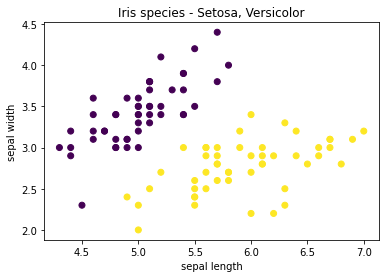

In [83]:
plt.scatter(x.iloc[:,0],x.iloc[:,1], c = y)

plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("Iris species - Setosa, Versicolor")

## Training the Perceptron for iris data

In [86]:
def forward_prop(row):
    y_hat = np.dot(x.iloc[row], w) + b
    
    if y_hat > 0:
        return 1
    else:
        return 0

In [87]:
def backward_prop(y_hat, row, w, b):
    w[0]  = w[0] + alpha * (y[row] - y_hat) * x.iloc[row][0]
    w[1]  = w[1] + alpha * (y[row] - y_hat) * x.iloc[row][1]
    b     = b + alpha * (y[row] - y_hat)
    
    return w,b

In [88]:
#Initialize weights 
w = np.random.normal(size=2)
b = np.random.normal()
 
# learning rate
alpha = 0.01
 
# number of epochs
for epoch in range(1000) :
     
    # for each row in x
    for row in range(x.shape[0]) :
         
        # for each row in x, predict y_hat
        y_hat = forward_prop(row)
        # for each row calculate weights
        backward_prop(y_hat,row, w, b)
print(w,b)        

[ 0.75872164 -1.29332867] -0.010499062797233255


In [89]:
y_pred = predict(np.array(x))

In [90]:
from sklearn.metrics import accuracy_score

accuracy_score(y,y_pred)

0.99